In [13]:
import pandas as pd
import torch, torchvision
import json

In [1]:
import zipfile
import os

zip_path = 'data/archive.zip'
extract_to = 'data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [15]:
DATASET_PATH = 'data/images'

with open('data/cat_to_name.json', 'r') as f:
    CATEGORY_NAMES = json.load(f)

In [68]:
# Dataset does not implement (in standard definition) batching, shuffling, multiprocessing etc. All these are easier with DataLoaders

class OxfordFlowers(torch.utils.data.Dataset):
    def __init__(self, data_path, split='train', transform=None):
        self.__data_path = data_path
        self.__split = split
        self.img_and_labels = self.__create_labels()    # (image, label) list of tuples
        self.transform = transform

    # Create a list of tuples (image, label) from file
    def __create_labels(self):
        split_folder = os.path.join(self.__data_path, self.__split)   # 'data/images/train' etc.
        labels = sorted(os.listdir(split_folder))
        label_to_idx = {name: idx for idx, name in enumerate(labels)}   # {"1":0, "2":1...}

        img_and_labels = []
        for label in labels:
            label_folder = os.path.join(split_folder, label)
            for file in os.listdir(label_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    filename = os.path.join(label_folder, file)
                    img_and_labels.append((filename,label_to_idx[label]))
        return img_and_labels

    def __len__(self):
        return len(self.img_and_labels)

    def __getitem__(self, idx):
        filename, label = self.img_and_labels[idx]
        image = torchvision.io.read_image(filename).float()/255.0   # Convert from PyTorch int [0,255] to float [0,1] because Normalize() expects this
        if self.transform:
            image = self.transform(image)
        return image, label


In [69]:
transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.Normalize(mean=0.5, std=0.5)
    ])

training_data = OxfordFlowers(DATASET_PATH, split='train', transform=transforms)
valid_data = OxfordFlowers(DATASET_PATH, split='valid', transform=transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9755855..0.7951219].


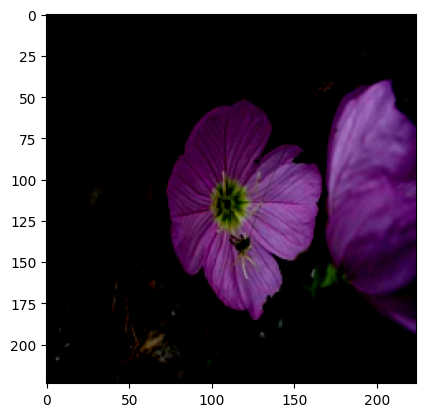

In [70]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].permute(1, 2, 0).numpy())

In [71]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)

In [72]:
train_features, train_labels = next(iter(train_loader))
train_features, train_labels

(tensor([[[[-8.1715e-01, -7.9685e-01, -6.0909e-01,  ..., -7.1495e-01,
            -7.1915e-01, -7.2079e-01],
           [-8.0359e-01, -7.8694e-01, -6.2760e-01,  ..., -7.4167e-01,
            -7.3290e-01, -7.3054e-01],
           [-8.0429e-01, -7.9873e-01, -8.0601e-01,  ..., -7.7602e-01,
            -7.5040e-01, -7.4240e-01],
           ...,
           [ 9.8399e-02,  1.0546e-01,  1.1230e-01,  ..., -4.5060e-01,
            -4.5225e-01, -4.6353e-01],
           [ 1.4978e-01,  1.4132e-01,  1.2347e-01,  ..., -4.6710e-01,
            -4.4491e-01, -4.4610e-01],
           [ 1.1610e-01,  1.0788e-01,  9.1260e-02,  ..., -4.6055e-01,
            -4.3032e-01, -4.2366e-01]],
 
          [[-7.5733e-01, -7.4374e-01, -5.1504e-01,  ..., -7.1495e-01,
            -7.1915e-01, -7.1881e-01],
           [-7.5673e-01, -7.4721e-01, -5.5437e-01,  ..., -7.4167e-01,
            -7.3290e-01, -7.2857e-01],
           [-7.6762e-01, -7.6866e-01, -7.5600e-01,  ..., -7.7602e-01,
            -7.5040e-01, -7.4042e-01],


In [75]:
train_features.shape, train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [76]:
img = train_features[0].squeeze()   # Removes all dimensions with size 1
img.shape

torch.Size([3, 224, 224])

In [89]:
a = [3,4,5]
a.extend([])
a

[3, 4, 5]

In [90]:
from oxford import preprocessing
training_dataloader = preprocessing.create_dataloader('train', batch_size=64, shuffle=True)

In [96]:
train_features, train_labels = next(iter(training_dataloader))
train_features, train_labels

(tensor([[[[-5.3573e-01, -5.3573e-01, -5.3573e-01,  ..., -3.4047e-01,
            -3.3148e-01, -3.1894e-01],
           [-5.2627e-01, -5.2627e-01, -5.2627e-01,  ..., -3.3845e-01,
            -3.2315e-01, -3.0683e-01],
           [-5.2760e-01, -5.2319e-01, -5.2513e-01,  ..., -3.3833e-01,
            -3.2215e-01, -3.2186e-01],
           ...,
           [-7.0854e-01, -7.0892e-01, -6.9705e-01,  ..., -3.0585e-01,
            -2.6974e-01, -2.4435e-01],
           [-7.1193e-01, -7.0429e-01, -6.9592e-01,  ..., -3.2445e-01,
            -3.5484e-01, -4.1261e-01],
           [-7.0325e-01, -7.0217e-01, -7.0132e-01,  ..., -4.0898e-01,
            -4.4425e-01, -5.2558e-01]],
 
          [[-6.5145e-02, -6.5145e-02, -6.5145e-02,  ...,  1.1376e-01,
             1.0816e-01,  1.2028e-01],
           [-5.5686e-02, -5.5686e-02, -5.5686e-02,  ...,  1.1578e-01,
             1.1650e-01,  1.3238e-01],
           [-5.7015e-02, -5.2598e-02, -5.4543e-02,  ...,  1.1590e-01,
             1.1750e-01,  1.1736e-01],


In [97]:
train_features.shape

torch.Size([64, 3, 224, 224])